In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
# Helpers

def plot_pie(df, var):
    value_counts = df[var].value_counts()
    ax = value_counts.plot.pie()
    return ax.set_axis_off()


def plot_bar(df, var):
    return df[var].value_counts().plot.bar()

In [4]:
df = pd.read_excel('dap_haripur_data.xlsx').fillna('')
print('No of rows', len(df))

No of rows 300


In [5]:
df_2 = pd.read_csv('results-survey136546.csv').fillna('')
print('No of rows', len(df_2))

No of rows 38


## Age by Village

<AxesSubplot:xlabel='Village/Ward'>

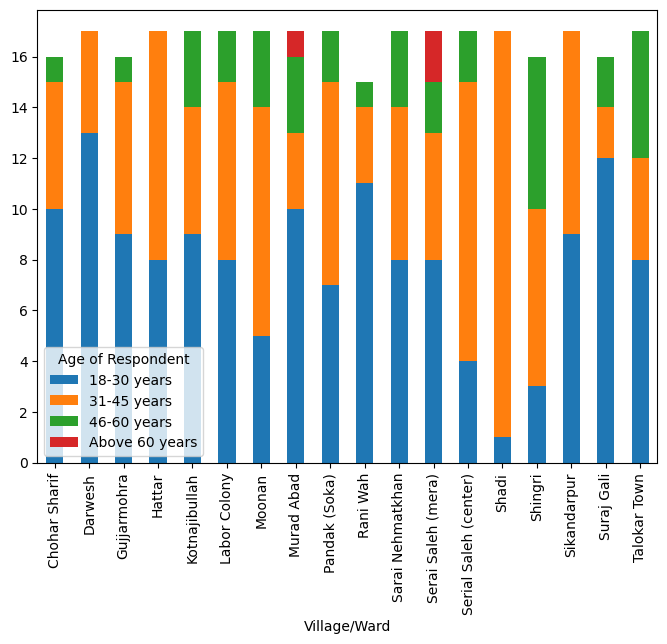

In [6]:
df2 = df.groupby(['Village/Ward', 'Age of Respondent'])['Village/Ward'] \
    .count().unstack('Age of Respondent').fillna(0)
df2[df2.columns].plot(kind='bar', stacked=True)

## Profession by Education

<AxesSubplot:xlabel='Education of Respondent '>

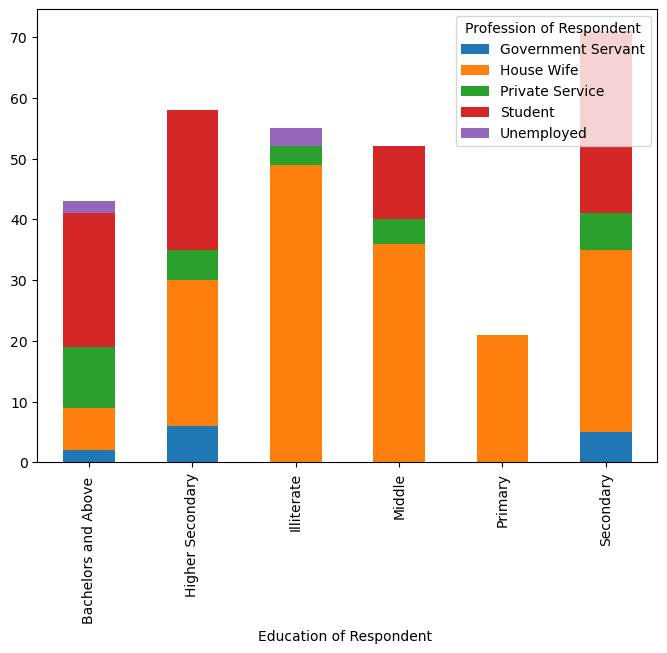

In [7]:
df2 = df.groupby(['Education of Respondent ', 'Profession of Respondent'])['Education of Respondent '] \
    .count().unstack('Profession of Respondent').fillna(0)
df2[df2.columns].plot(kind='bar', stacked=True)

## 1. Do you believe that pandemic Covid-19 exists in your area?

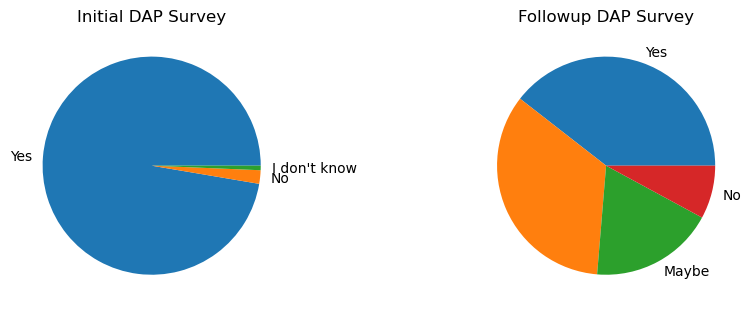

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=10)
df['1. Do you believe that pandemic Covid-19 exists in your area?'].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['Do you believe that pandemic Covid-19 exists in your area? '].value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 2. What is your firm belief about Covid-19?

In [9]:
df['2. What is your firm belief about Covid-19?'].value_counts()

It is a fatal pandemic preventable through SoPs    290
Not Sure about it                                    6
It is a conspiracy no such thing exists              4
Name: 2. What is your firm belief about Covid-19?, dtype: int64

In [10]:
df_2['What is your firm belief about Covid-19?'].value_counts()

It is a fatal pandemic preventable through SoPs    23
                                                   13
Not Sure about it                                   2
Name: What is your firm belief about Covid-19?, dtype: int64

In [11]:
Service_one_hot = pd.get_dummies(df_2['What is your firm belief about Covid-19?'], dtype=bool)
del Service_one_hot['']

In [12]:
def question_2():
    fig, axes = plt.subplots(2, 1, figsize=(5, 5))
    fig.tight_layout(h_pad=3)
    df['2. What is your firm belief about Covid-19?'].value_counts().plot.barh(ax=axes[0], title='Initial DAP Survey')

    mini_df = pd.get_dummies(df_2['What is your firm belief about Covid-19?'], dtype=bool)
    del mini_df['']
    mini_df['It is a conspiracy no such thing exists'] = False
    mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

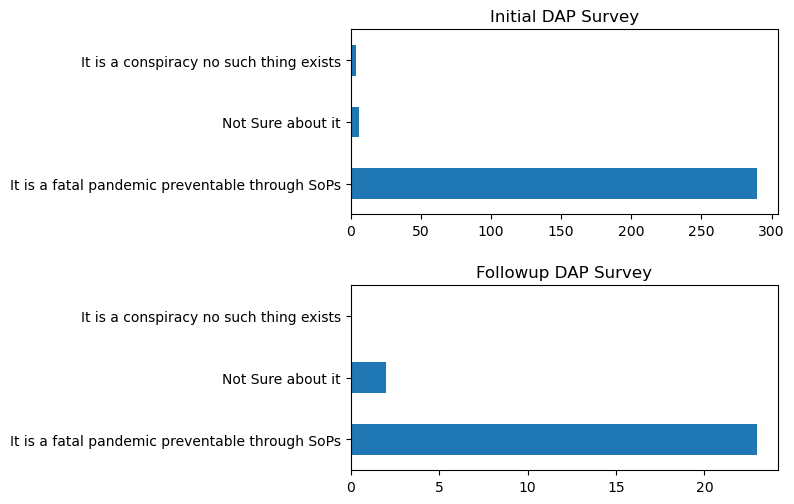

In [13]:
question_2()

## 3. In your opinion what is the best way to avoid /fight the pandemic

<AxesSubplot:title={'center':'Followup DAP Survey'}>

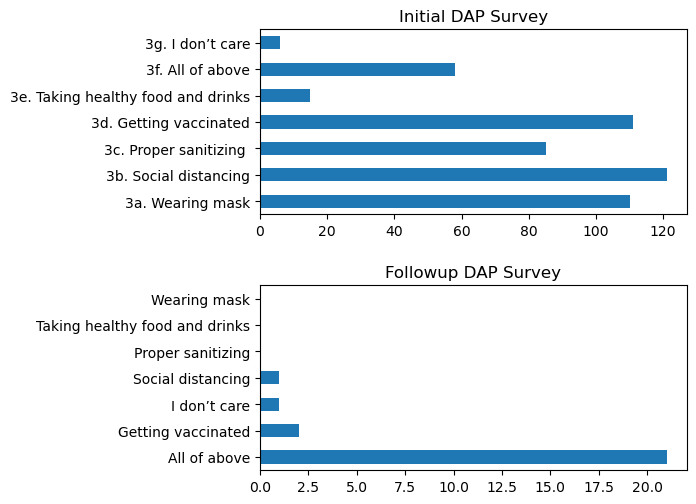

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '3a. Wearing mask',
    '3b. Social distancing',
    '3c. Proper sanitizing ',
    '3d. Getting vaccinated',
    '3e. Taking healthy food and drinks',
    '3f. All of above',
    '3g. I don’t care'
    
]].sum().plot.barh(ax=axes[0], title='Initial DAP Survey')

mini_df = pd.get_dummies(df_2['In your opinion what is the best way to avoid /fight the pandemic?'], dtype=bool)
del mini_df['']
mini_df['Proper sanitizing'] = False
mini_df['Taking healthy food and drinks'] = False
mini_df['Wearing mask'] = False
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 4. On a scale of 1-5 (where 1 is highly affected and 5 is not affected) how much do you think your family and livelihoods are affected by covid-19 pandemic problem?

<AxesSubplot:title={'center':'Followup DAP Survey'}>

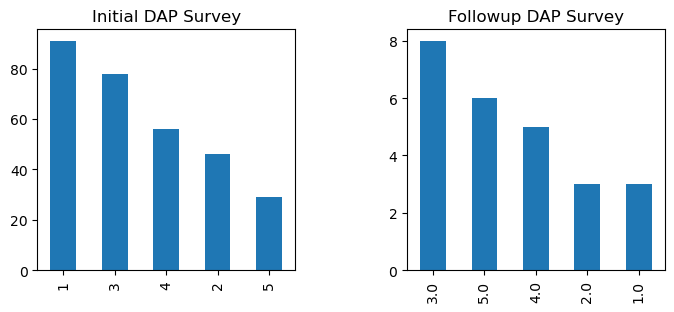

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
fig.tight_layout(w_pad=5)
df['4. On a scale of 1-5 (where 1 is highly affected and 5 is not affected) how much do you think your family and livelihoods are affected by covid-19 pandemic problem?'].value_counts().plot.bar(ax=axes[0], title='Initial DAP Survey')
df_2[
    df_2['On a scale of 1-5 (where 1 is highly affected and 5 is not affected) how much do you think your family and livelihoods are affected by covid-19 pandemic problem?'] != ''
]['On a scale of 1-5 (where 1 is highly affected and 5 is not affected) how much do you think your family and livelihoods are affected by covid-19 pandemic problem?'].value_counts().plot.bar(ax=axes[1], title='Followup DAP Survey')

## 5. Which of the following are the symptoms of Covid-19?

<AxesSubplot:title={'center':'Followup DAP Survey'}>

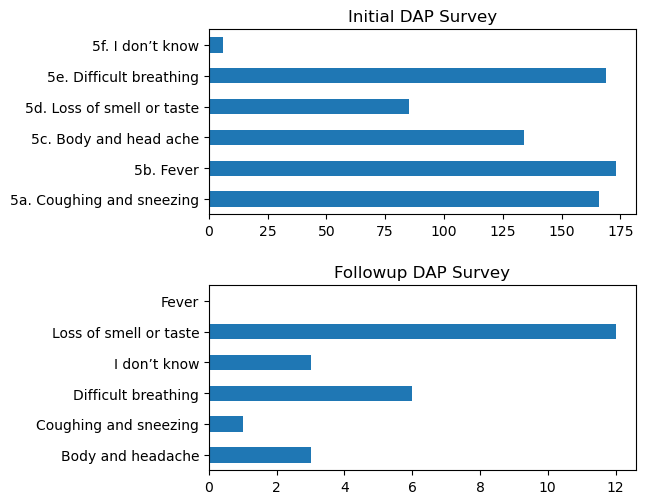

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '5a. Coughing and sneezing',
    '5b. Fever',
    '5c. Body and head ache',
    '5d. Loss of smell or taste',
    '5e. Difficult breathing',
    '5f. I don’t know'
    
]].sum().plot.barh(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['Which of the following are the symptoms of Covid-19?'], dtype=bool)
del mini_df['']
mini_df['Fever'] = False
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 6. In case you feel any of the above symptoms what will be your first reaction

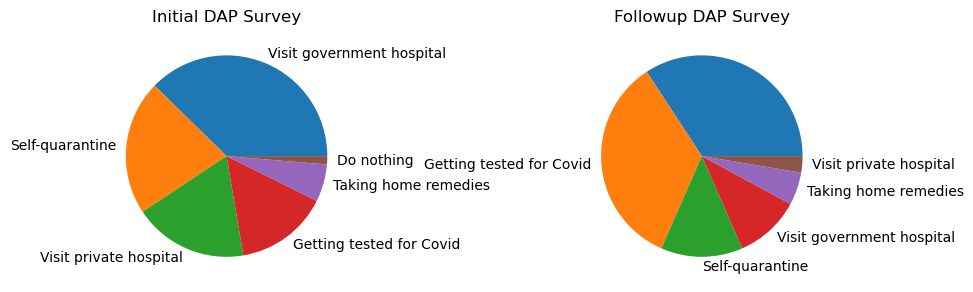

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=13)
df['6. In case you feel any of the above symptoms what will be your first reaction;'].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['In case you feel any of the above symptoms what will be your first reaction'].value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 7. Which of the following statements do you agree with?

<AxesSubplot:title={'center':'Followup DAP Survey'}>

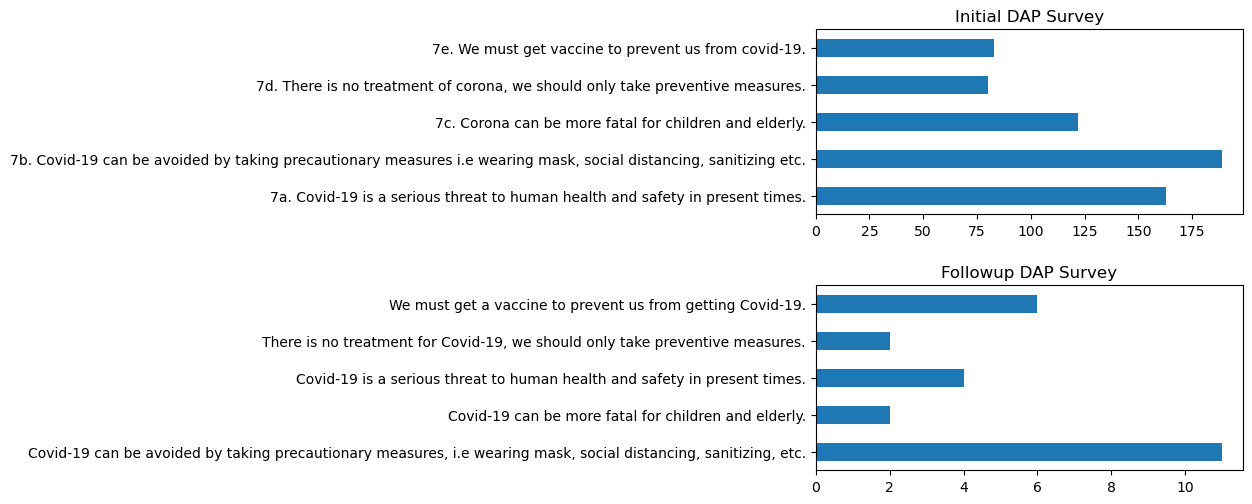

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '7a. Covid-19 is a serious threat to human health and safety in present times.',
    '7b. Covid-19 can be avoided by taking precautionary measures i.e wearing mask, social distancing, sanitizing etc.',
    '7c. Corona can be more fatal for children and elderly.',
    '7d. There is no treatment of corona, we should only take preventive measures.',
    '7e. We must get vaccine to prevent us from covid-19.'
]].sum().plot.barh(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['Which of the following statements do you agree with?'], dtype=bool)
del mini_df['']
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 8. In your opinion what kind of information regarding Covid-19 is most reliable and should be followed most?

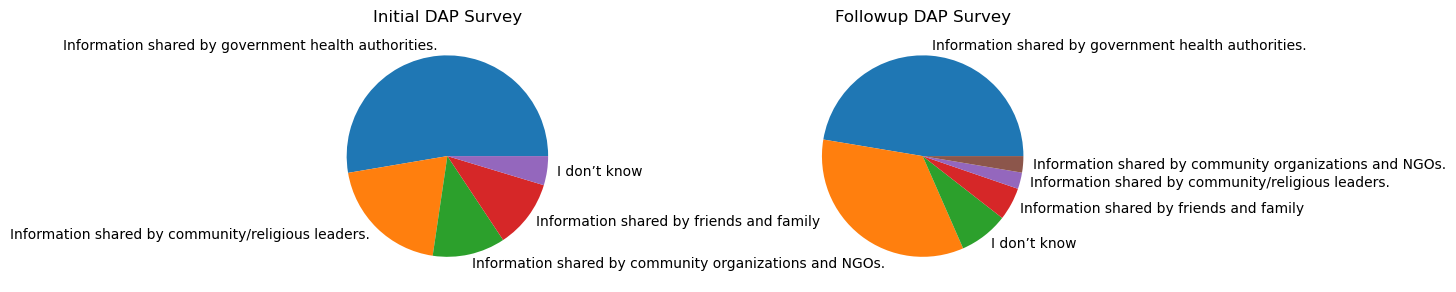

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=13)
df['8. In your opinion what kind of information regarding Covid-19 is most reliable and should be followed most?'].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['In your opinion what kind of information regarding Covid-19 is most reliable and should be followed most?'].value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 9. Do you think women are most vulnerable to the issues and risks associated with Covid-19 and its social and economic impacts?

<AxesSubplot:title={'center':'Followup DAP Survey'}>

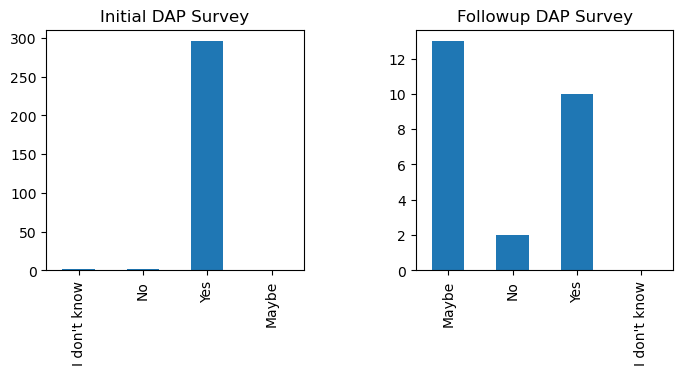

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
fig.tight_layout(w_pad=5)

mini_df = pd.get_dummies(df['9. Do you think women are most vulnerable to the issues and risks associated with Covid-19 and its social and economic impacts?'], dtype=bool)
mini_df['Maybe'] = False

mini_df[list(mini_df.columns)].sum().plot.bar(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['Do you think women are most vulnerable to the issues and risks associated with Covid-19 and its social and economic impacts?'], dtype=bool)
del mini_df['']
mini_df["I don't know"] = False
mini_df[list(mini_df.columns)].sum().plot.bar(ax=axes[1], title='Followup DAP Survey')

## 10. If yes what are the key issues you as a woman face due to Covid-19 situation?

In [45]:
df2 = df[[
    '10a. Disruption in family income and unemployment',
    '10b. Increased work burden',
    '10c. Food Shortage',
    '10d. Unbearable medical costs',
    '10e. Educational Problems/Closure of schools',
    '10f. Isolation',
    '10g. Home based violence',
    '10h. I don’t know'
]]

/var/folders/89/20b0rw6x4mq8vbvn_1_1bcz40000gn/T/ipykernel_6141/3397966125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = df2[column].replace('', 0).apply(int)


<AxesSubplot:title={'center':'Initial DAP Survey'}>

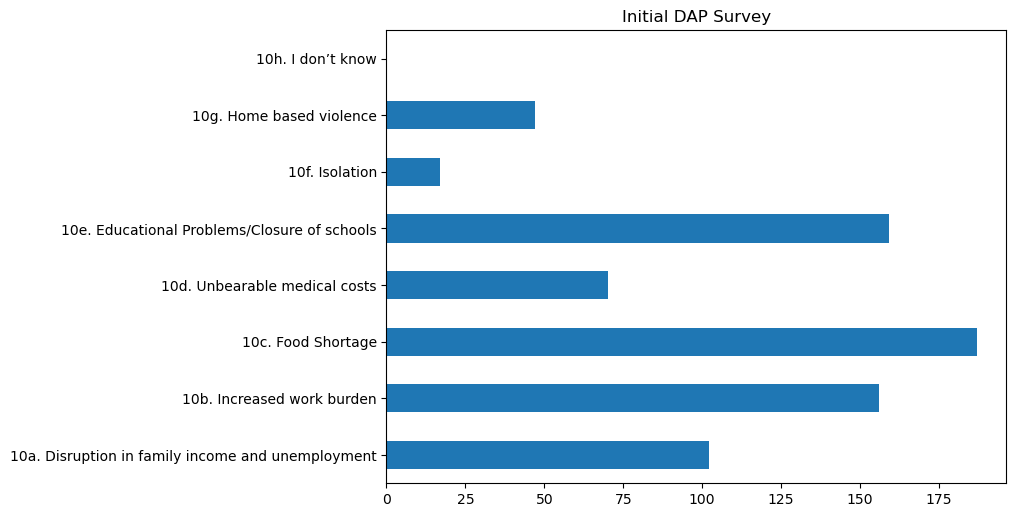

In [46]:
for column in df2.columns:
    df2[column] = df2[column].replace('', 0).apply(int)
    
df2.sum().plot.barh(title='Initial DAP Survey')

## 11. Do you know about official government helpline numbers to get COVID-19 related information and support?

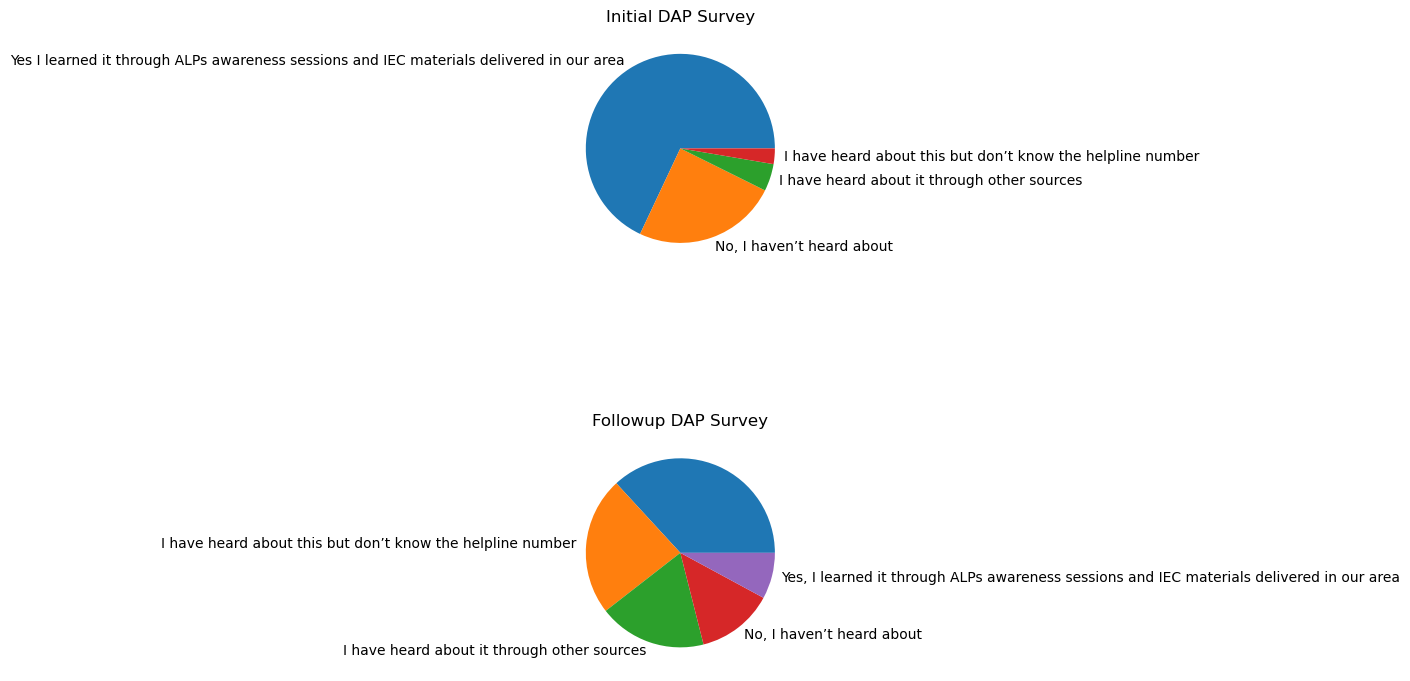

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
fig.tight_layout(h_pad=10)
df['11. Do you know about official government helpline numbers to get COVID-19 related information and support? '].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['Do you know about official government helpline numbers to get CovidOVID-19 related information and support? '].value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 12. On a scale of 1-5 how accessible are government services and facilities on covid-19 for you?

<AxesSubplot:title={'center':'Followup DAP Survey'}>

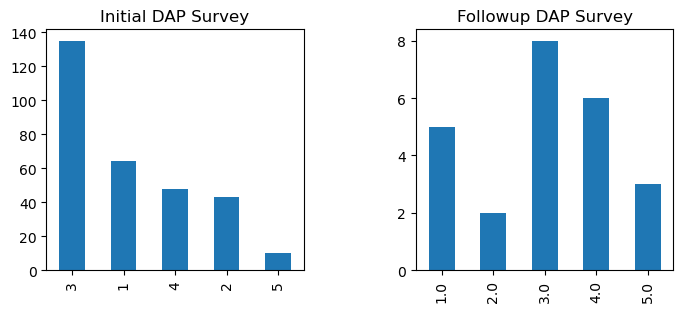

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
fig.tight_layout(w_pad=5)
df['12. On a scale of 1-5 how accessible are government services and facilities on covid-19 for you?'].value_counts().plot.bar(ax=axes[0], title='Initial DAP Survey')

mini_df = pd.get_dummies(df_2['On a scale of 1-5 how accessible are government services and facilities on covid-19 for you?'], dtype=bool)
del mini_df['']
mini_df[list(mini_df.columns)].sum().plot.bar(ax=axes[1], title='Followup DAP Survey')

## 13. In your opinion, how government should support citizens to fight against coronavirus? 

<AxesSubplot:title={'center':'Followup DAP Survey'}>

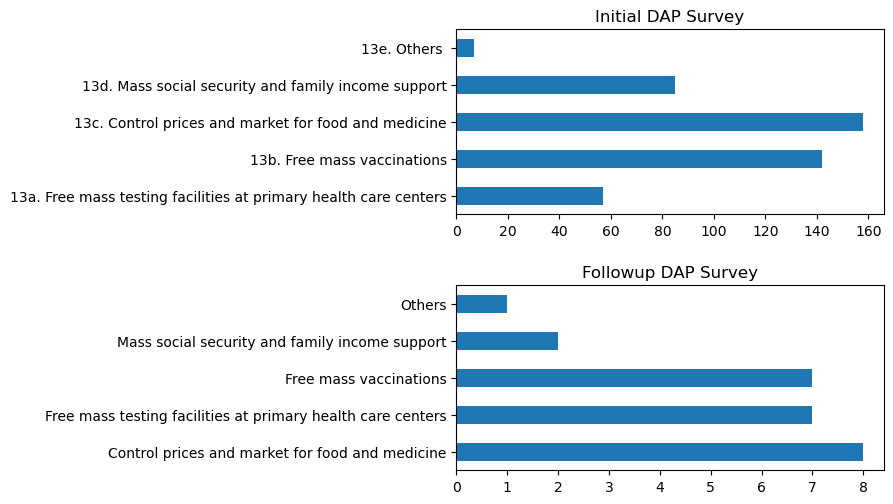

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '13a. Free mass testing facilities at primary health care centers',
    '13b. Free mass vaccinations',
    '13c. Control prices and market for food and medicine',
    '13d. Mass social security and family income support',
    '13e. Others '
]].replace('', 0).sum().plot.barh(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['In your opinion, how should government support citizens to fight against coronavirus?'], dtype=bool)
del mini_df['']
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 14. In your opinion what role women can play in fighting Coronavirus? 

<AxesSubplot:title={'center':'Followup DAP Survey'}>

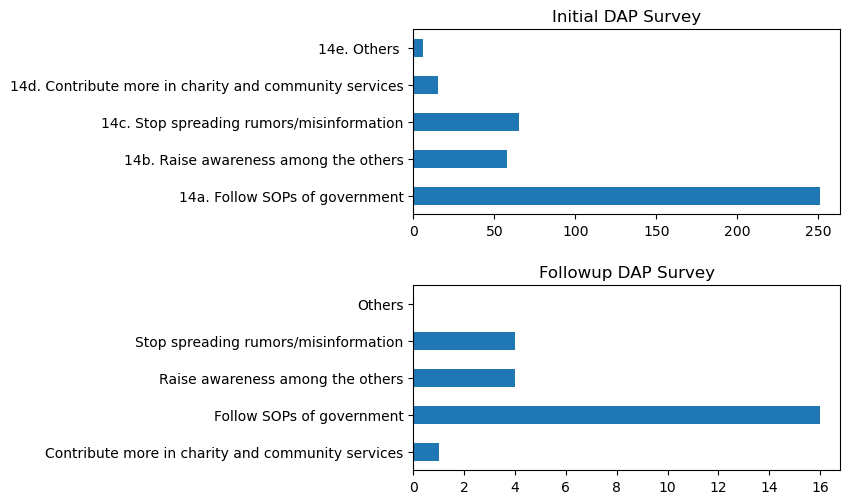

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '14a. Follow SOPs of government',
    '14b. Raise awareness among the others',
    '14c. Stop spreading rumors/misinformation',
    '14d. Contribute more in charity and community services',
    '14e. Others '
]].replace('', 0).sum().plot.barh(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['In your opinion, what role can you play in fighting Coronavirus? '], dtype=bool)
del mini_df['']
mini_df['Others'] = False
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 15. Which of the following preventive measures do you follow to keep yourself and your family safe from contracting the virus? 

<AxesSubplot:title={'center':'Followup DAP Survey'}>

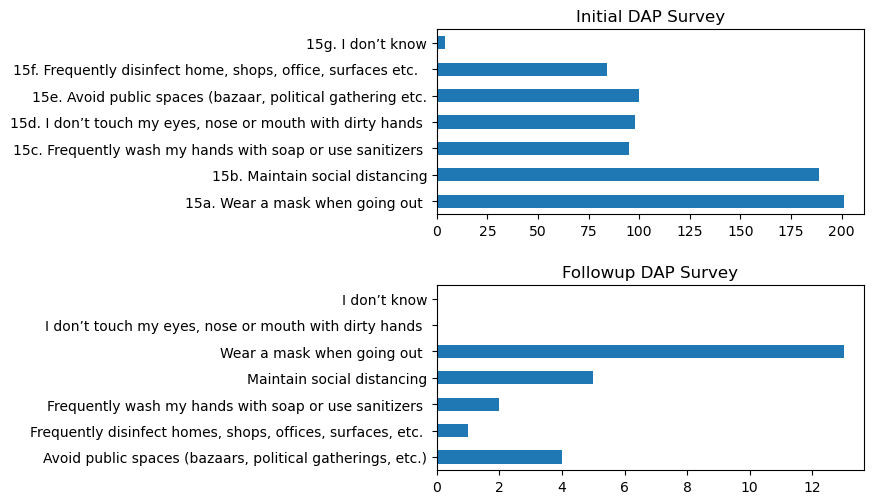

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout(h_pad=3)
df[[
    '15a. Wear a mask when going out ',
    '15b. Maintain social distancing',
    '15c. Frequently wash my hands with soap or use sanitizers ',
    '15d. I don’t touch my eyes, nose or mouth with dirty hands ',
    '15e. Avoid public spaces (bazaar, political gathering etc.',
    '15f. Frequently disinfect home, shops, office, surfaces etc.  ',
    '15g. I don’t know'
]].replace('', 0).sum().plot.barh(ax=axes[0], title='Initial DAP Survey')
mini_df = pd.get_dummies(df_2['Which of the following preventive measures do you follow to keep yourself and your family safe from contracting the virus? '], dtype=bool)
del mini_df['']
mini_df['I don’t touch my eyes, nose or mouth with dirty hands '] = False
mini_df['I don’t know'] = False
mini_df[list(mini_df.columns)].sum().plot.barh(ax=axes[1], title='Followup DAP Survey')

## 16. If the government runs Coronavirus vaccination campaign in your district, would you immunize yourself?

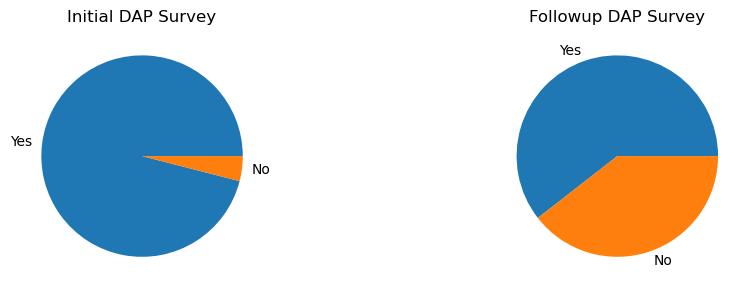

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=13)
df['16. If the government runs Coronavirus vaccination campaign in your district, would you immunize yourself?'].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['If the government runs a Coronavirus vaccination campaign in your district, would you immunize yourself?'].replace('', 'No').value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 17. In your opinion, what type of women specific information on Covid-19 our organization should produce through newsletter, radio messages/programs & IEC material? 

<AxesSubplot:>

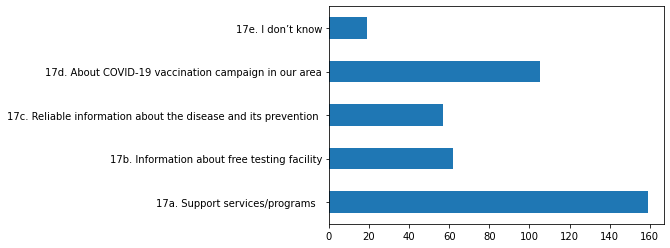

In [109]:
df[[
    '17a. Support services/programs  ',
    '17b. Information about free testing facility',
    '17c. Reliable information about the disease and its prevention ',
    '17d. About COVID-19 vaccination campaign in our area',
    '17e. I don’t know'
]].sum().plot.barh()

## 18. Do you find too many fake news, rumors and misinformation on covid-19 circulating in your community? 

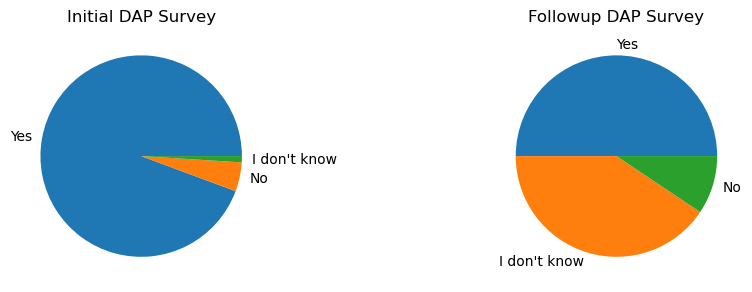

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=13)
df['18. Do you find too many fake news, rumors and misinformation on covid-19 circulating in your community? '].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2[
    df_2['Do you find too much fake news, rumors, and misinformation on Covid-19 circulating in your community? '] != 'Maybe'
]['Do you find too much fake news, rumors, and misinformation on Covid-19 circulating in your community? '].replace('', "I don't know").value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()

## 19. How do you think women should be supported to avoid spread of rumors and misinformation in your communities?  

<AxesSubplot:>

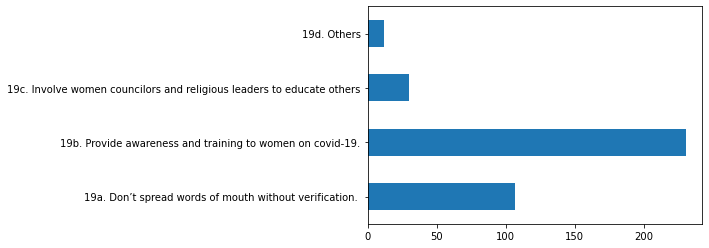

In [111]:
df[[
    '19a. Don’t spread words of mouth without verification. ',
    '19b. Provide awareness and training to women on covid-19.',
    '19c. Involve women councilors and religious leaders to educate others',
    '19d. Others'
]].sum().plot.barh()

## 20. Have you ever been contacted by local women leaders to share information about COVID19 during the past 2 months?  

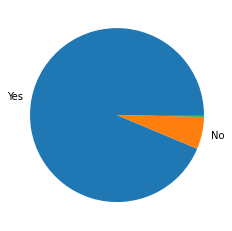

In [112]:
plot_pie(df, '20. Have you ever been contacted by local women leaders to share information about COVID19 during the past 2 months?  ')

## 21. Did you participate in ALP community awareness sessions on COVID19 during recent past?  

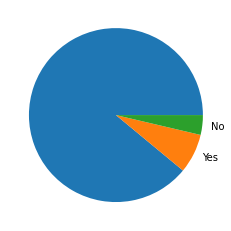

In [115]:
plot_pie(df, '21. Did you participate in ALP community awareness sessions on COVID19 during recent past?  ')

## 22. If yes, how will you rate effectiveness of these sessions? (1 Not effective, 5 highly effective)

<AxesSubplot:>

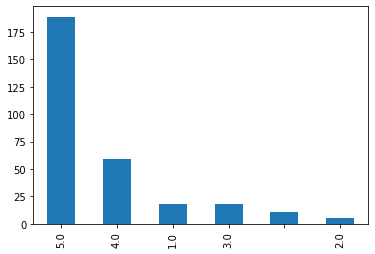

In [116]:
plot_bar(df, '22. If yes, how will you rate effectiveness of these sessions? (1 Not effective, 5 highly effective)')

## 23. Do you think that local community awareness programs on COVID19 can help build better community response against the pandemic?

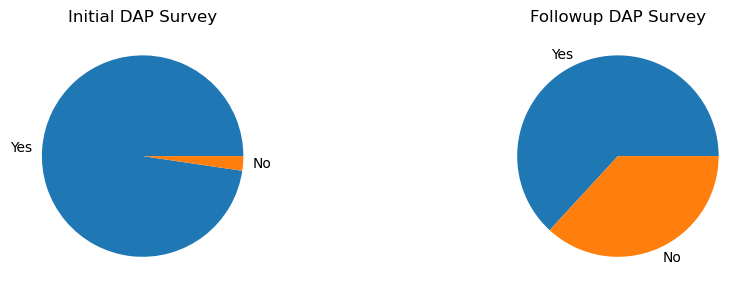

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(w_pad=13)
df['23. Do you think that local community awareness programs on COVID19 can help build better community response against the pandemic?'].value_counts().plot.pie(ax=axes[0], title='Initial DAP Survey').set_axis_off()
df_2['Do you think that local community awareness programs on Covid-19 can help build better community response against the pandemic?'].replace('', 'No').value_counts().plot.pie(ax=axes[1], title='Followup DAP Survey').set_axis_off()